In [2]:
import pandas as pd
import os
import spacy
#from src.test_image_model.preprocessing import Preprocessing
nlp = spacy.load("en_core_web_sm")

all_us = pd.read_csv("../../data/all.csv")["User story"]

%run ../preprocessing/preprocessing.py

In [5]:
new_list_us = []
for us in all_us:
    split = split_us(us)
    if(split[1].find("/")!=-1):
        
        new_list_us.append(us)#.replace("/"," and "))


In [62]:
Preprocessing().process(["As a ResearcherDeveloper,I would like the ability import/export from MSSQL, so that I can use Data Packages in workflows that involve MSSQL."])

[(['As a ResearcherDeveloper, I would like to be provided with the ability import/export from MSSQL, so that I can use Data Packages in workflows that involve MSSQL.'],
  [<PreprocessingEnums.add_control: 3>])]

## Analyse "/" CASE

In [6]:
#Cas du même mot au pluriel
list_us = []
for us in new_list_us:
    doc = nlp(us)
    for i in range(0,len(doc)):
        if(doc[i].text =="/"):
            if (doc[i-1].lemma_ == doc[i+1].lemma_):
                print(doc[i-1].text," - ",doc[i+1].text)
                new_us = doc[:i].text+" "+doc[i+2:].text
                print(doc)
                print(new_us)
            else:
                list_us.append(us)
print(len(list_us))
list_us = (list(set(list_us)))
len(list_us)

file  -  files
As a Data Publishing User, I want to have my dataset update automatically as the source file/files changes, So that OpenSpending always shows current data.
As a Data Publishing User, I want to have my dataset update automatically as the source file changes, So that OpenSpending always shows current data.
his  -  her
As a camp administrator, I want to be able to warn a camp worker who I think did his/her job inappropriate.
As a camp administrator, I want to be able to warn a camp worker who I think did his job inappropriate.
group  -  groups
As a camp administrator, I want to be able to see only events for a specific group/groups on the event calendar, so that I can easily read the data on the calendar without too much clutter.
As a camp administrator, I want to be able to see only events for a specific group on the event calendar, so that I can easily read the data on the calendar without too much clutter.
83


61

In [67]:
list_us=[us.replace("MS-SQL","MSSQL") for us in list_us]
bad_us = "As a ResearcherDeveloper, would like the ability import/export from MSSQL, so that I can use Data Packages in workflows that involve MSSQL. "
list_us=[us for us in list_us if(us != bad_us)]



In [56]:
list_new_us=[new_us for (new_us,_) in Preprocessing().process(list_us)]

In [58]:
list_us_pre = []
for us in list_new_us:
    list_us_pre+=us
len(list_us_pre)

69

In [49]:
#def remove_slash(us):
    
def replace_slash_by_or(us):
    doc = nlp(us)
    for i in range(0,len(doc)):
        if(doc[i].text =="/"):
            if(doc[i+1].dep_=="conj"):
                doc = replace_tok_in_doc(doc,i,"or")
                
            elif(doc[i-1].dep_ in ["nmod","dobj","amod","npadvmod"]):
                doc = replace_tok_in_doc(doc,i,"or")
            
            elif(doc[i-1].tag_ =="VB"):
                new_doc = replace_tok_in_doc(doc,i,"or")
                if(doc[i+1].tag_ =="VB"):
                    doc = new_doc
                elif(new_doc[i+1].tag_ =="VB"):
                    doc = new_doc
    return doc.text
def replace_slash_by_one_word(us):
    doc = nlp(us)
    tok_merge = 0
    for i in range(0,len(doc)):
        i=i-tok_merge*2
        if(doc[i].text =="/"):
            print(doc[i-1].text.upper()," / ",doc[i+1].text.upper()," - TAG : ",doc[i-1].tag_," / ",doc[i+1].tag_," - DEP : ",doc[i-1].dep_," / ",doc[i+1].dep_)
            if(doc[i-1].dep_ in ["compound","det"] and doc[i+1].dep_ in ["compound"]):
                doc = replace_tok_in_doc(doc,i,"or") 
                new_us = doc[:i].text+"_"+doc[i+1:].text
                doc = nlp(new_us)
                tok_merge+=1
                
    return doc.text           
def replace_tok_in_doc(doc,id,word=""):
    """
    return doc with token with id replace by word
    """
    new_sent = doc[:id].text+" "+word+" "+doc[id+1:].text
    new_sent = new_sent.replace("  "," ")
    return nlp(new_sent)
replace_slash_by_one_word("As an A/V admin, I want to filter and rank videos based on A/V quality aspects.")

A  /  V  - TAG :  NN  /  NN  - DEP :  nmod  /  compound
A  /  V  - TAG :  NNP  /  CD  - DEP :  det  /  compound


'As an A/V admin, I want to filter and rank videos based on A_V quality aspects.'

In [23]:
for us in list_us:
    print(us)
    doc = nlp(us)
    for i in range(0,len(doc)):
        if(doc[i].text=="/"):
            print(doc[i-1].text.upper()," / ",doc[i+1].text.upper()," - TAG : ",doc[i-1].tag_," / ",doc[i+1].tag_," - DEP : ",doc[i-1].dep_," / ",doc[i+1].dep_)
    print()

As an admin, I want to filter and rank videos based on A/V quality aspects.
A  /  V  - TAG :  NNP  /  CD  - DEP :  det  /  compound

As a Zooniverse admin, I want to assess the probability/weight of a volunteer's classification based on their experience.
PROBABILITY  /  WEIGHT  - TAG :  NN  /  NN  - DEP :  nmod  /  dobj

As a release engineer, I want to configure nightly builds that automatically perform a Neurohub installation on a virgin operating system, execute tests and report back results, without requiring any manual input/interaction.
INPUT  /  INTERACTION  - TAG :  NN  /  NN  - DEP :  nmod  /  dobj

As a crossdeptprojteammember, I want to have a better place to collect and share project materials, with a range of organization/tagging and access options, including private (internal group use only), University and public.
ORGANIZATION  /  TAGGING  - TAG :  NN  /  NN  - DEP :  nmod  /  nmod

As a team member, I want to meet with DIS / cloud.gov, so that I can determine the requir

In [53]:

print(len(all_us))

df = pd.DataFrame()
#df["us"]= [us.replace("/"," and ") for us in list_us]
df["us"] = all_us
df.to_csv("./us_to_display.csv")

1675


As_a_depositor,_I_want_to_have_a_user_interface_that_is_familiar_to_me,_so_that_I_feel_like_all_the_University_systems_are_joined_up..png


As_a_researcher,_I_want_to_upload_files_prior_to_having_them_attached_to_a_log_book_page_using_the_web_interface..png


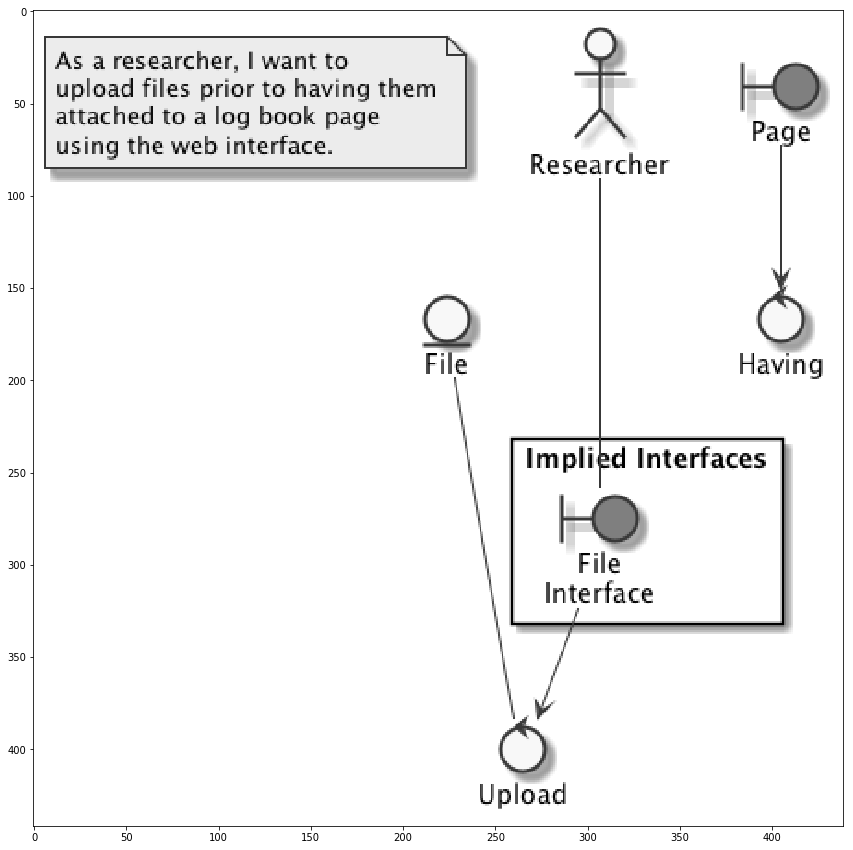

As_a_repository_administrator,_I_want_to_provide_a_Linked_Data_interface_to_the_repository..png


As_a_dataset_developer,_I_want_to_separate_the_interface_from_the_implementation_of_a_dataset_type..png


As_an_app_developer,_I_want_to_only_depend_on_the_interface_of_a_dataset_type_in_my_app_and_have_the_system_inject_the_implementation_at_runtime..png


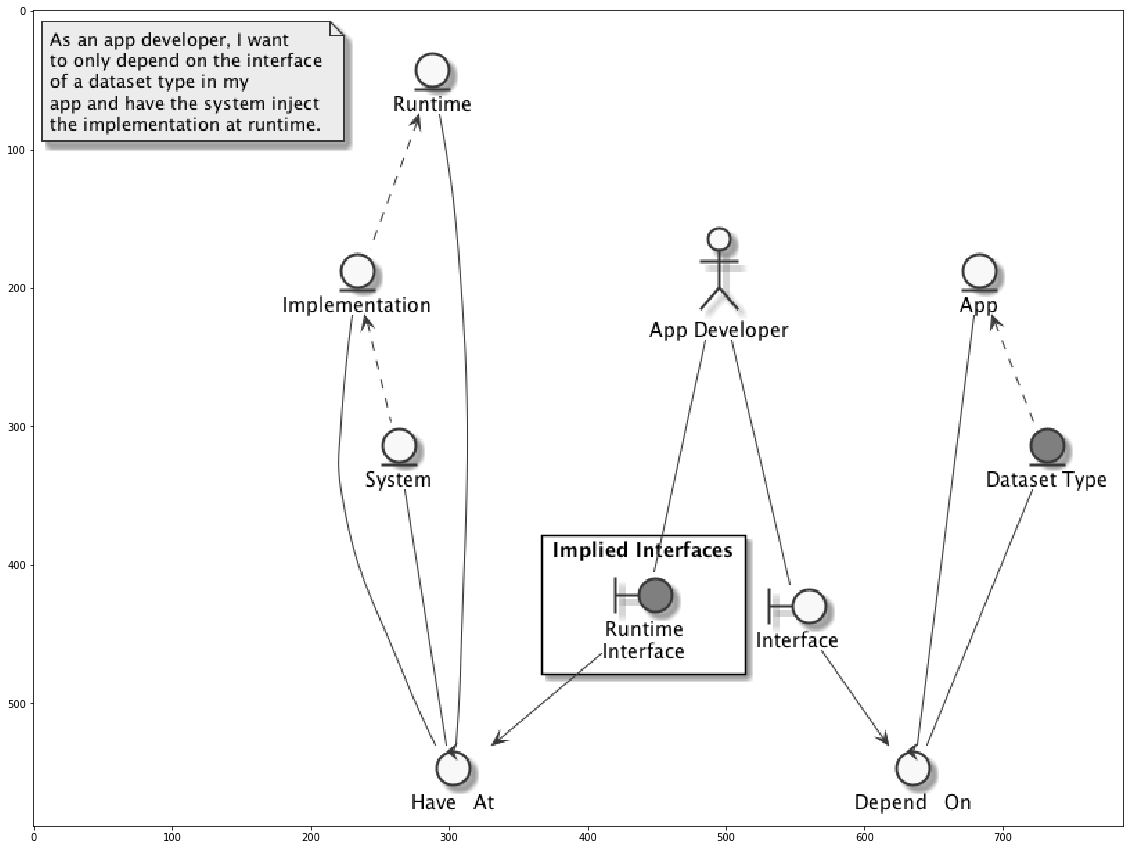

As_a_repository_administrator,_I_want_to_be_able_to_update_the_repository_index_without_disrupting_access_to_the_public_interface._(See_dul-hydra_wiki).png


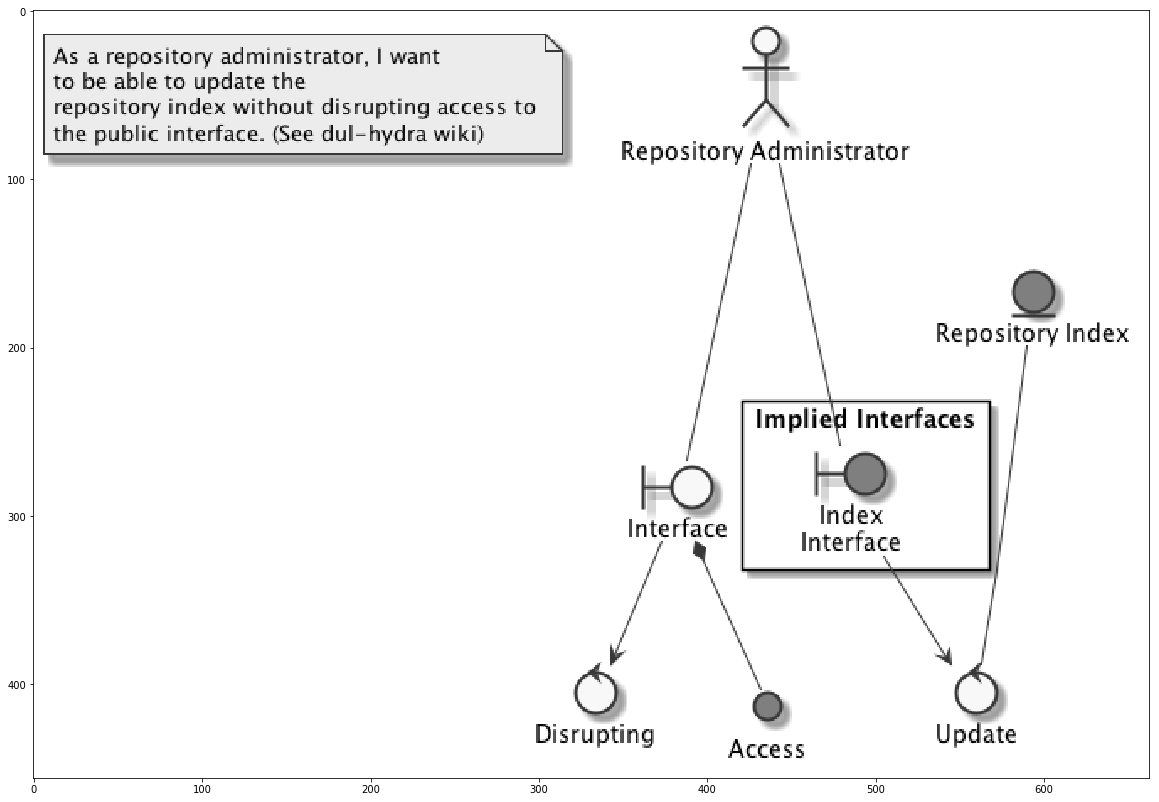

As_a_repository_administrator,_I_want_to_view_available_versions_of_an_object_and_be_able_to_restore_a_version_from_the_staff_interface..png


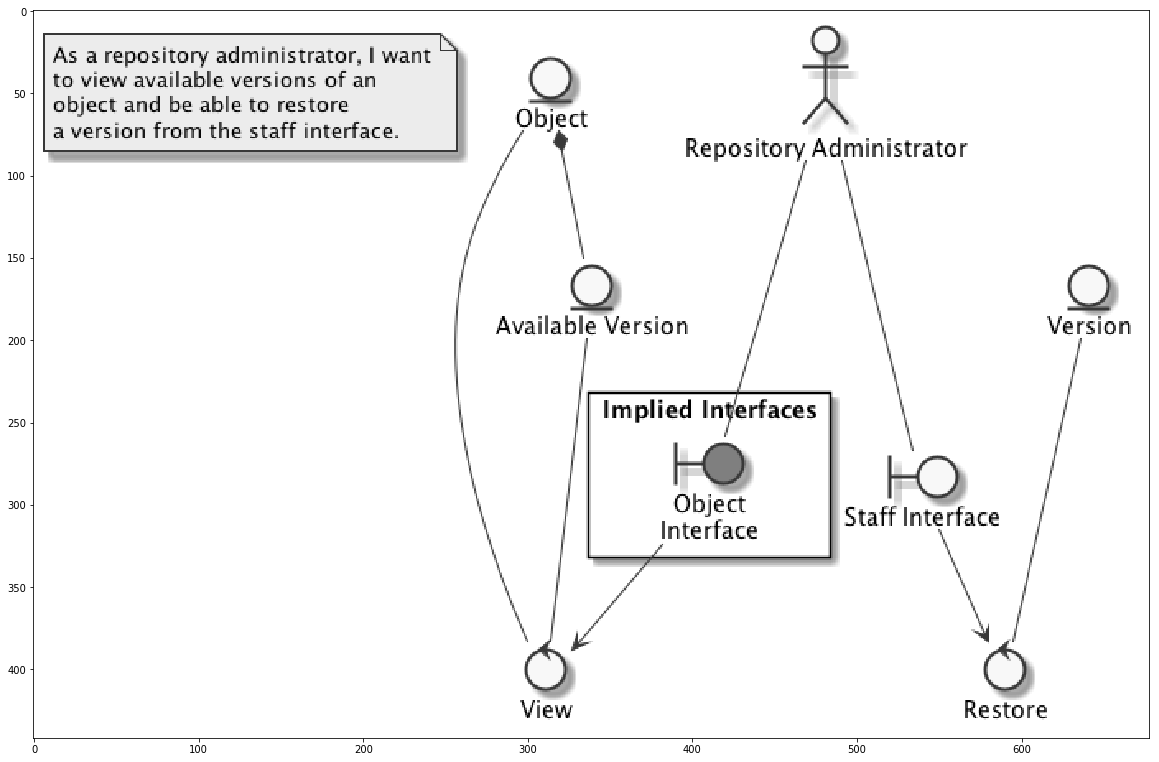

As_an_app_developer,_I_want_to_write_unit_tests_for_an_app_that_depends_on_the_interface_of_a_dataset_type..png


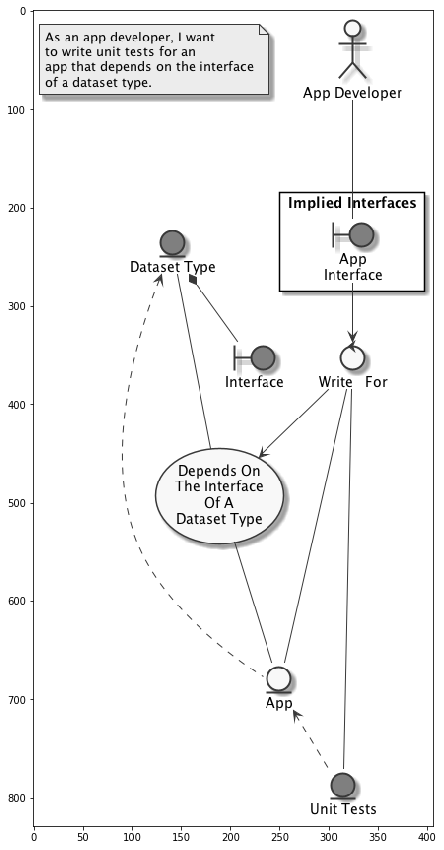

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os



path_save1 = "../djangoserver/out/test1/"
path_save2 = "../djangoserver/out/test2/"
path_save3 = "../djangoserver/out/test3/"
path_save4 = "../djangoserver/out/test_inter/"







def print_image_model(path_image):
    img = cv2.imread(path_image,1)
    cv2.imshow('image',img)

    plt.figure(figsize=(20,15))
    plt.imshow(img)
    plt.show()

for f in os.listdir(path_save4):
    if(f.split(".")[-1]=="png"):
        print(f)
        #print_image_model(path_save1+f)
        #print_image_model(path_save2+f)
        #print_image_model(path_save3+f)
        print_image_model(path_save4+f)


        




        




In [4]:
import os


path_save1 = "../djangoserver/out/test1/"
path_save2 = "../djangoserver/out/test2/"
#### !!! remove file !!!
for f in os.listdir(path_save1):
    try:
        os.remove(path_save1+f)
        print(f+" is remove")
    except PermissionError:
        print("can t remove : ",f)
    
for f in os.listdir(path_save2):
    try:
        os.remove(path_save2+f)
        print(f+" is remove")
    except PermissionError:
        print("can t remove : ",f)

As_a_Developer,_I_want_to_be_able_to_customise_the_Brand_Name_and_Icon,_and_Primary_Color_of_all_frontend_Javascript_apps,_So_that_I_can_customise_the_branding_for_my_own_needs..txt is remove
As_a_user,_I_want_to_have_my_personal_information_kept_securely_in_the_database_of_the_website,_so_that_I_will_not_suffer_from_identity_theft_or_telephone_harassment..png is remove
As_a_user,_I_want_to_be_able_to_get_the_hours_of_each_recycling_facility,_so_that_I_can_arrange_drop-offs_on_my_off_days_or_during_after-work_hours..png is remove
As_a_user,_I_want_to_be_able_to_access_the_site_and_do_all_the_other_stuffs_on_all_of_my_electronic_devices..txt is remove
As_a_site_visitor,_I_want_to_have_an_advanced_search_option_that_lets_me_fill_in_a_form_of_search_criteria,_so_that_I_can_quickly_find_what_I_am_looking_for..png is remove
As_a_Data_Publishing_User,_I_want_to_be_able_to_edit_the_data_source_of_data_I_have_already_imported,_So_that_I_can_fix_bugs_or_make_enhancements_in_the_API_built_for_my